In [10]:
import pandas as pd
import plotly.express as px

# Calcular estatísticas descritivas (média, mediana, desvio padrão).

In [3]:
csv_path = "data_root/earthquakes.csv"
df = pd.read_csv(csv_path)
df.head()

,id,magnitude,type,title,date,time,updated,url,detailUrl,felt,...,location,continent,country,subnational,city,locality,postcode,what3words,timezone,locationDetails
0,us7000necw,4.8,earthquake,"M 4.8 - 33 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182289,1726583895255,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1893,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79783.0,landmass.perkily.affords,-300,"[{'id': '80684', 'wikidataId': '', 'name': '79..."
1,tx2024shcj,5.1,earthquake,"M 5.1 - 34 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182183,1726672002991,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2042,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79331.0,escalator.grownups.dwell,-300,"[{'id': '89341', 'wikidataId': '', 'name': '48..."
2,ci40734823,3.7,earthquake,"M 3.7 - 6 km N of Malibu, CA",2024-09-16T11:22:08,1726485728190,1726637414586,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,1580,...,"Malibu, CA",North America,United States of America (the),California,Los Angeles,Agoura Hills-Malibu,90265.0,clocking.uploaded.issuer,-420,"[{'id': '93478', 'wikidataId': 'Q844837', 'nam..."
3,tx2024scvz,3.9,earthquake,"M 3.9 - 58 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266539,1726584426218,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,5,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,sailboats.sawn.speeding,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
4,us7000ndte,4.1,earthquake,"M 4.1 - 60 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266382,1726334616179,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,4,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,spinners.downtime.computes,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."


In [4]:
df_dropped = df.drop(columns=["time","updated", "url", "detailUrl", "code", "ids", "types"])
df_dropped.head()

,id,magnitude,type,title,date,felt,cdi,mmi,alert,status,...,location,continent,country,subnational,city,locality,postcode,what3words,timezone,locationDetails
0,us7000necw,4.8,earthquake,"M 4.8 - 33 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1893,6,5,green,reviewed,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79783.0,landmass.perkily.affords,-300,"[{'id': '80684', 'wikidataId': '', 'name': '79..."
1,tx2024shcj,5.1,earthquake,"M 5.1 - 34 km WSW of Ackerly, Texas",2024-09-17T00:49:42,2042,6,5,green,reviewed,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79331.0,escalator.grownups.dwell,-300,"[{'id': '89341', 'wikidataId': '', 'name': '48..."
2,ci40734823,3.7,earthquake,"M 3.7 - 6 km N of Malibu, CA",2024-09-16T11:22:08,1580,4,4,NaN,reviewed,...,"Malibu, CA",North America,United States of America (the),California,Los Angeles,Agoura Hills-Malibu,90265.0,clocking.uploaded.issuer,-420,"[{'id': '93478', 'wikidataId': 'Q844837', 'nam..."
3,tx2024scvz,3.9,earthquake,"M 3.9 - 58 km S of Whites City, New Mexico",2024-09-14T17:01:06,5,3,4,green,reviewed,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,sailboats.sawn.speeding,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
4,us7000ndte,4.1,earthquake,"M 4.1 - 60 km S of Whites City, New Mexico",2024-09-14T17:01:06,4,3,4,green,reviewed,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,spinners.downtime.computes,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."


In [5]:
# Média
df_media = df_dropped["magnitude"].mean()
print(f"A média da magnitude é: {df_media:.2f}")

A média da magnitude é: 4.86


In [6]:
# Mediana
df_mediana = df_dropped["magnitude"].median()
print(f"A mediana da magnitude é: {df_mediana:.2f}")

A mediana da magnitude é: 5.30


In [7]:
# Desvio Padrão
df_desvio_padrao = df_dropped["magnitude"].std()
print(f"O Desvio Padrão da magnitude é: {df_desvio_padrao:.2f}")

O Desvio Padrão da magnitude é: 1.05


In [26]:
# criando novas colunas para separar data e hora
df_dropped['data'] = df_dropped['date'].str.split('T').str[0]
df_dropped['hora'] = df_dropped['date'].str.split('T').str[1]

# Converter a hora para dattime epara facilitar manipulação
df_dropped['hora'] = pd.to_datetime(df_dropped['hora'], format='%H:%M:%S').dt.time

# Função para categorizar o período do dia
def categorizar_periodo(hora):
    if 5 <= hora.hour < 12:
        return 'Manhã'
    elif 12 <= hora.hour < 18:
        return 'Tarde'
    else:
        return 'Noite'

# Aplicar a função e criar a nova coluna 'periodo'
df_dropped['periodo'] = df_dropped['hora'].apply(categorizar_periodo)

#print(df_dropped)

In [8]:
# graficos buscando representar acontecidos por ano, omde aconteceu
# data, hora, magnitude, 



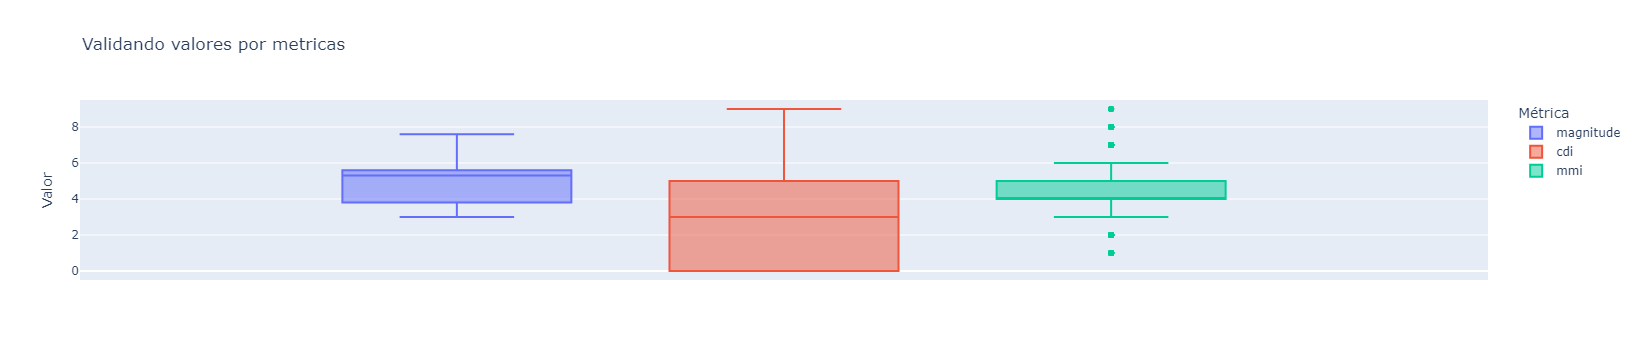

In [99]:
df_meltada = pd.melt(
    df_dropped,
    value_vars=['magnitude', 'cdi', 'mmi'],  
    var_name='medida', 
    value_name='valor'  
)

fig_analise_outliers = px.box(data_frame=df_meltada, y='valor', color='medida',  labels={'valor': 'Valor', 'medida': 'Métrica'}, title='Validando valores por metricas')
fig_analise_outliers.show()

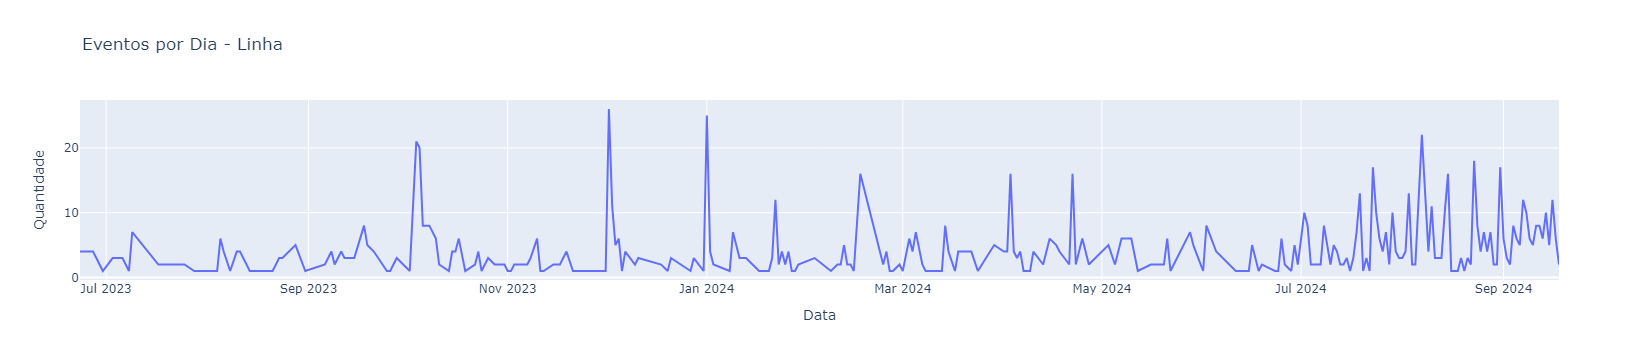

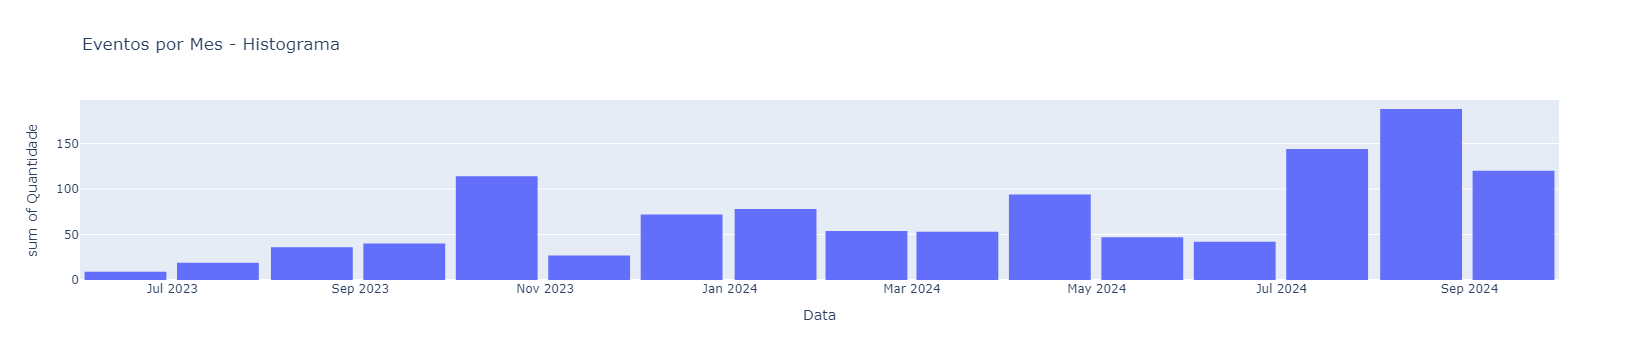

In [111]:
# Converter para formato datetime
df_dropped['data'] = pd.to_datetime(df_dropped['data'])


df_agrupado_data = df_dropped.groupby(df_dropped['data'].dt.date).size().reset_index(name='quantidade')

fig_por_dia = px.line(df_agrupado_data, x='data', y='quantidade', title='Eventos por Dia - Linha', labels={'data': 'Data', 'quantidade': 'Quantidade'})
fig_por_dia.show()


fig_por_mes = px.histogram(df_agrupado_data, x='data', y='quantidade', title='Eventos por Mes - Histograma', labels={'data': 'Data', 'quantidade': 'Quantidade'})
fig_por_mes.update_layout(bargap=0.1)  
fig_por_mes.show()

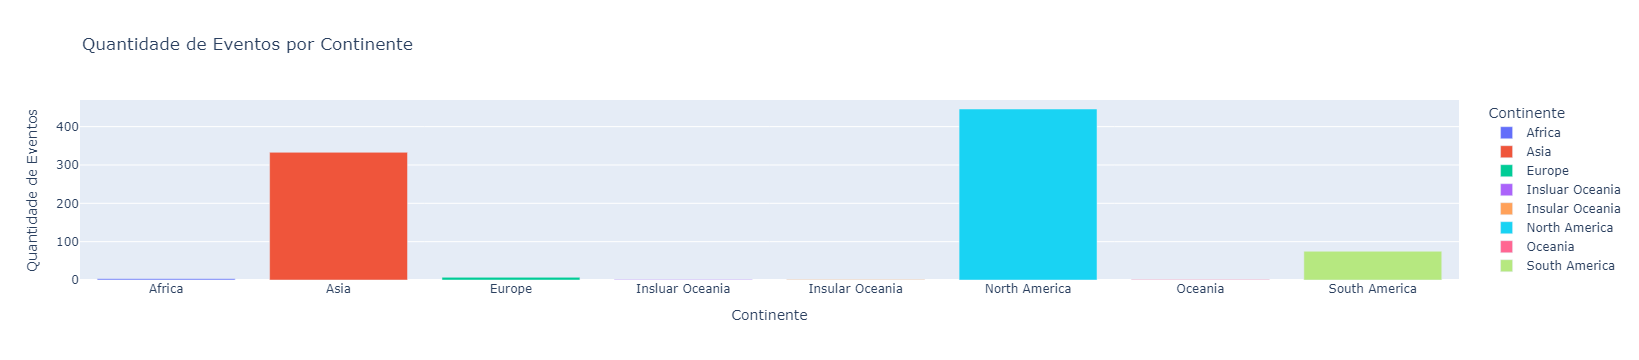

In [130]:

df_terremotos_por_continente = df_dropped.groupby('continent').size().reset_index(name='quantidade')


fig_bar = px.bar(
    df_terremotos_por_continente,
    x='continent',
    y='quantidade',
    labels={
        'continent': 'Continente',
        'quantidade': 'Quantidade de Eventos'
    },
    title='Quantidade de Eventos por Continente',
    color='continent'
)


fig_bar.show()

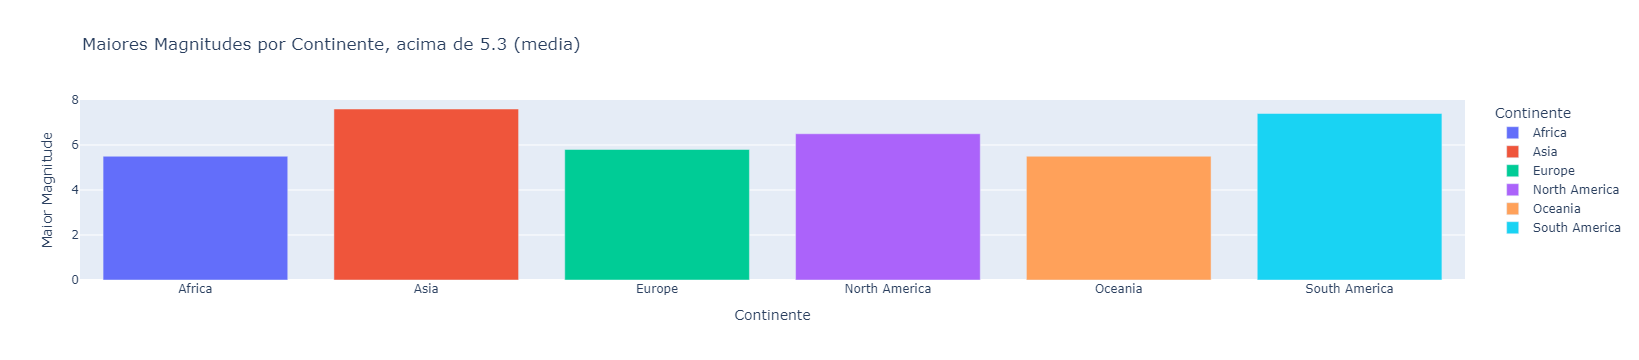

In [122]:
# Filtrar magnitudes maiores que 5.3
maiores_terremotos = df[df['magnitude'] > 5.3]

# Agrupar por continente e pegar as maiores magnitudes
df_max_magnitude = maiores_terremotos.groupby('continent')['magnitude'].max().reset_index()


fig_bar = px.bar(
    df_max_magnitude,
    x='continent',
    y='magnitude',
    labels={
        'continent': 'Continente',
        'magnitude': 'Maior Magnitude'
    },
    title='Maiores Magnitudes por Continente, acima de 5.3 (media) ',
    color='continent'
)


fig_bar.show()

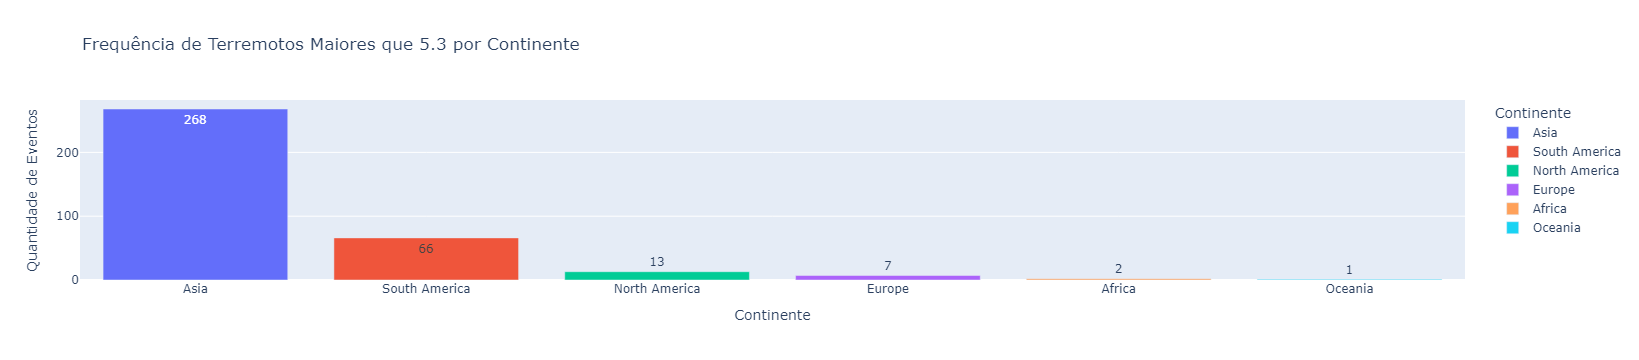

In [121]:
frequencia_por_continente = maiores_terremotos['continent'].value_counts().reset_index()
frequencia_por_continente.columns = ['continentes', 'frequencia'] 

fig_mnaiores_continentes = px.bar(
    frequencia_por_continente,
    x='continentes',
    y='frequencia',
    labels={
        'continentes': 'Continente',
        'frequencia': 'Quantidade de Eventos'
    },
    title='Frequência de Terremotos Maiores que 5.3 por Continente',
    text='frequencia',
    color='continentes'
)

fig_mnaiores_continentes.show()

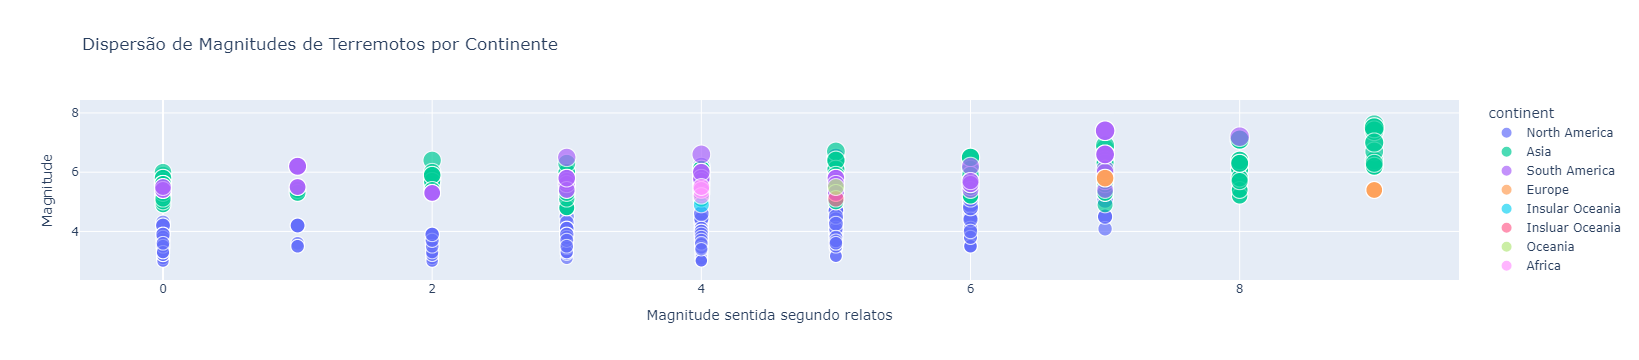

In [136]:
fig_scatter = px.scatter(
    df_dropped,
    x='cdi',  
    y='magnitude', 
    labels={
        'cdi': 'Magnitude sentida segundo relatos',
        'magnitude': 'Magnitude'
    },
    title='Dispersão de Magnitudes de Terremotos por Continente',
    color='continent', 
    size='magnitude', 
    hover_name='continent',  
    size_max=20 
)

fig_scatter.show()

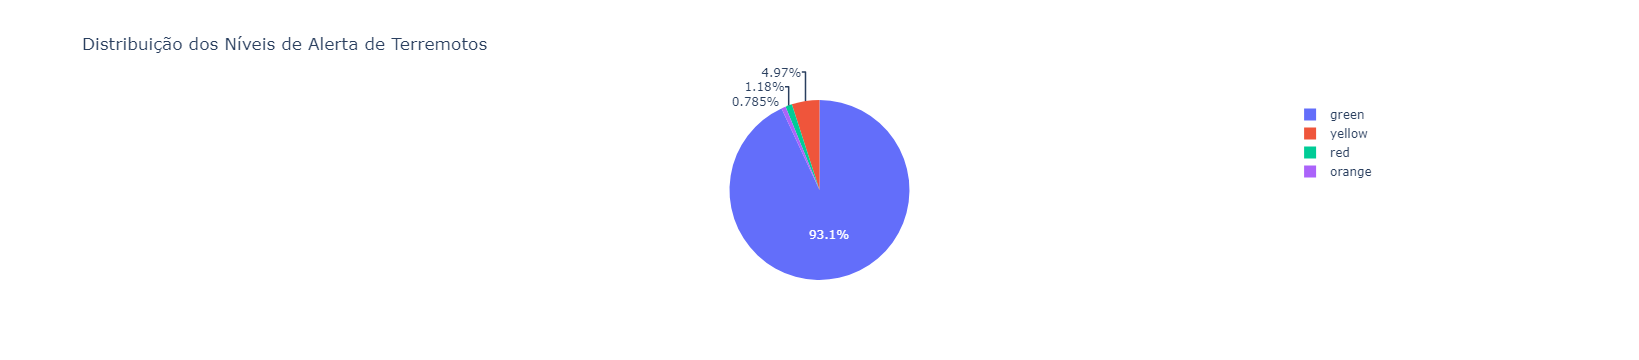

In [144]:
df_alert = df_dropped[df_dropped['alert'].notna()]

# Criar gráfico de pizza com base na coluna 'alert'
fig_pizza_alert = px.pie(
    df_alert,
    names='alert',  
    title='Distribuição dos Níveis de Alerta de Terremotos'
)

fig_pizza_alert.show()